<a href="https://colab.research.google.com/github/BIGGUARDWADE/Python-Stocks-/blob/main/PythonProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
#LOAD THE DATA
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [4]:
#STORE DATA INTO DATA FRAME
df = pd.read_csv('AAPL.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-25,148.309998,148.880005,147.119995,148.110001,147.286728,35195900
1,2022-11-28,145.139999,146.639999,143.380005,144.220001,143.418381,69246000
2,2022-11-29,144.289993,144.809998,140.350006,141.169998,140.385315,83763800
3,2022-11-30,141.399994,148.720001,140.550003,148.029999,147.207169,111380900
4,2022-12-01,148.210007,149.130005,146.610001,148.309998,147.485626,71250400
5,2022-12-02,145.960007,148.000000,145.649994,147.809998,146.988403,65447400


In [5]:
#get the number of trading days
df.shape

(251, 7)

<function matplotlib.pyplot.show(close=None, block=None)>

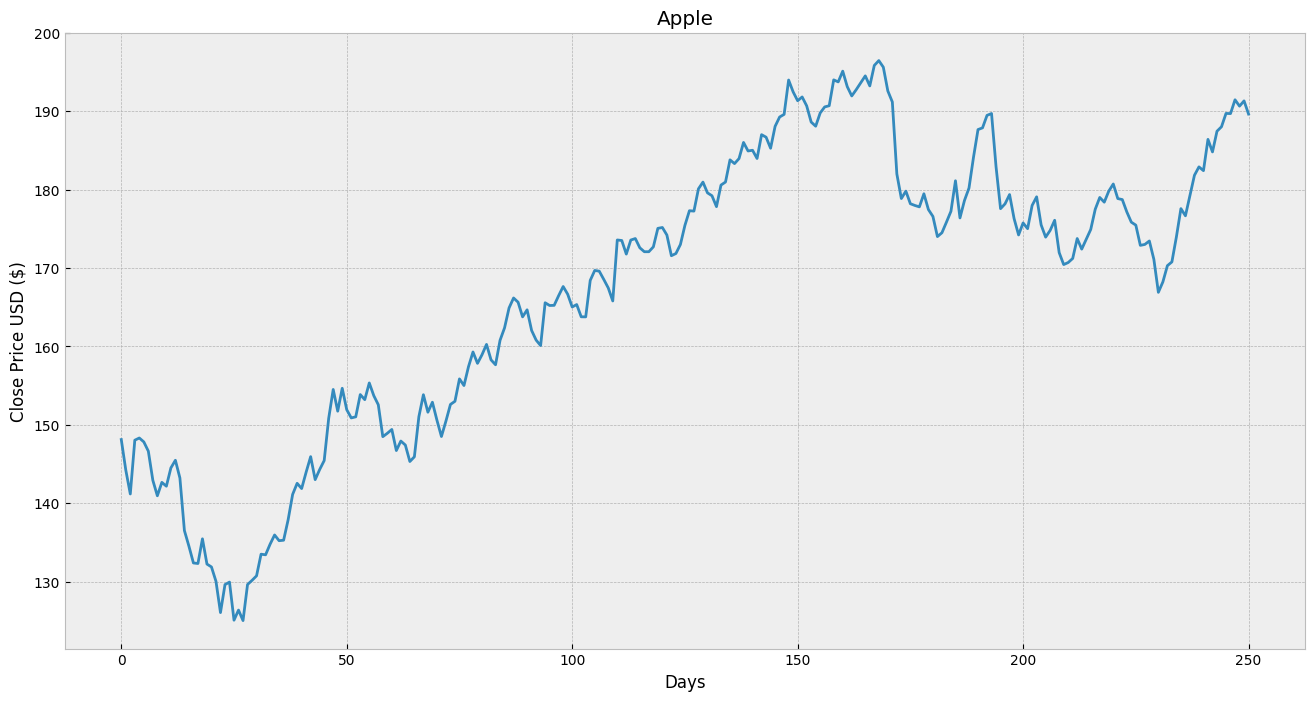

In [8]:
#visualize the close price data
plt.figure(figsize = (16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show

In [9]:
#Get the close price
df = df[['Close']]
df.head(4) #Prints the first 4 rows

,Close
0,148.110001
1,144.220001
2,141.169998
3,148.029999


In [10]:
#Creates a variable to predict 'x' days out into the future.
future_days = 25
#Create a new column (target) shifted 'c' units/days up
df['Prediction'] = df[['Close']].shift(-future_days) #Tries to predict values x days from whatever the current price is.
df.head(4)

<ipython-input-10-094853d5154d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days) #Tries to predict values x days from whatever the current price is.


,Close,Prediction
0,148.110001,125.070000
1,144.220001,126.360001
2,141.169998,125.019997
3,148.029999,129.619995


In [13]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[148.110001]
 [144.220001]
 [141.169998]
 [148.029999]
 [148.309998]
 [147.809998]
 [146.630005]
 [142.910004]
 [140.940002]
 [142.649994]
 [142.160004]
 [144.490005]
 [145.470001]
 [143.210007]
 [136.5     ]
 [134.509995]
 [132.369995]
 [132.300003]
 [135.449997]
 [132.229996]
 [131.860001]
 [130.029999]
 [126.040001]
 [129.610001]
 [129.929993]
 [125.07    ]
 [126.360001]
 [125.019997]
 [129.619995]
 [130.149994]
 [130.729996]
 [133.490005]
 [133.410004]
 [134.759995]
 [135.940002]
 [135.210007]
 [135.270004]
 [137.869995]
 [141.110001]
 [142.529999]
 [141.860001]
 [143.960007]
 [145.929993]
 [143.      ]
 [144.289993]
 [145.429993]
 [150.820007]
 [154.5     ]
 [151.729996]
 [154.649994]
 [151.919998]
 [150.869995]
 [151.009995]
 [153.850006]
 [153.199997]
 [155.330002]
 [153.710007]
 [152.550003]
 [148.479996]
 [148.910004]
 [149.399994]
 [146.710007]
 [147.919998]
 [147.410004]
 [145.309998]
 [145.910004]
 [151.029999]
 [153.830002]
 [151.600006]
 [152.869995]
 [150.589996]
 [148.

<ipython-input-13-168567681559>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1))[:-future_days]


In [14]:
#Creat the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y=np.array(df['Prediction'])[:-future_days]
print(y)

[125.07     126.360001 125.019997 129.619995 130.149994 130.729996
 133.490005 133.410004 134.759995 135.940002 135.210007 135.270004
 137.869995 141.110001 142.529999 141.860001 143.960007 145.929993
 143.       144.289993 145.429993 150.820007 154.5      151.729996
 154.649994 151.919998 150.869995 151.009995 153.850006 153.199997
 155.330002 153.710007 152.550003 148.479996 148.910004 149.399994
 146.710007 147.919998 147.410004 145.309998 145.910004 151.029999
 153.830002 151.600006 152.869995 150.589996 148.5      150.470001
 152.589996 152.990005 155.850006 155.       157.399994 159.279999
 157.830002 158.929993 160.25     158.279999 157.649994 160.770004
 162.360001 164.899994 166.169998 165.630005 163.759995 164.660004
 162.029999 160.800003 160.100006 165.559998 165.210007 165.229996
 166.470001 167.630005 166.649994 165.020004 165.330002 163.770004
 163.759995 168.410004 169.679993 169.589996 168.539993 167.449997
 165.789993 173.570007 173.5      171.770004 173.559998 173.75

In [17]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [18]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [19]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-19-861fee0e31b0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[175.009995],
       [177.970001],
       [179.070007],
       [175.490005],
       [173.929993],
       [174.789993],
       [176.080002],
       [171.960007],
       [170.429993],
       [170.690002],
       [171.210007],
       [173.75    ],
       [172.399994],
       [173.660004],
       [174.910004],
       [177.490005],
       [178.990005],
       [178.389999],
       [179.800003],
       [180.710007],
       [178.850006],
       [178.720001],
       [177.149994],
       [175.839996],
       [175.460007]])

In [23]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[172.880005  173.        173.440002  171.100006  174.789993  172.880005
 177.149994  170.770004  173.970001  177.570007  177.570007  179.229996
 181.820007  182.889999  172.880005  186.399994  173.440002  178.850006
 181.110001  189.710007  189.690002  191.449997  190.639999  181.6350025
 189.630005 ]

[176.78804661 178.89059328 179.67194776 177.12900654 176.02090134
 176.63177515 177.54809225 174.62158408 173.53478701 173.71947618
 174.08884529 175.89304901 174.93411493 175.82912319 176.71702117
 178.5496433  179.61512087 179.18892558 180.19047734 180.8368699
 179.51567701 179.42333206 178.30812724 177.37761158 177.10769841]


<ipython-input-36-e7e7ffc4e1ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

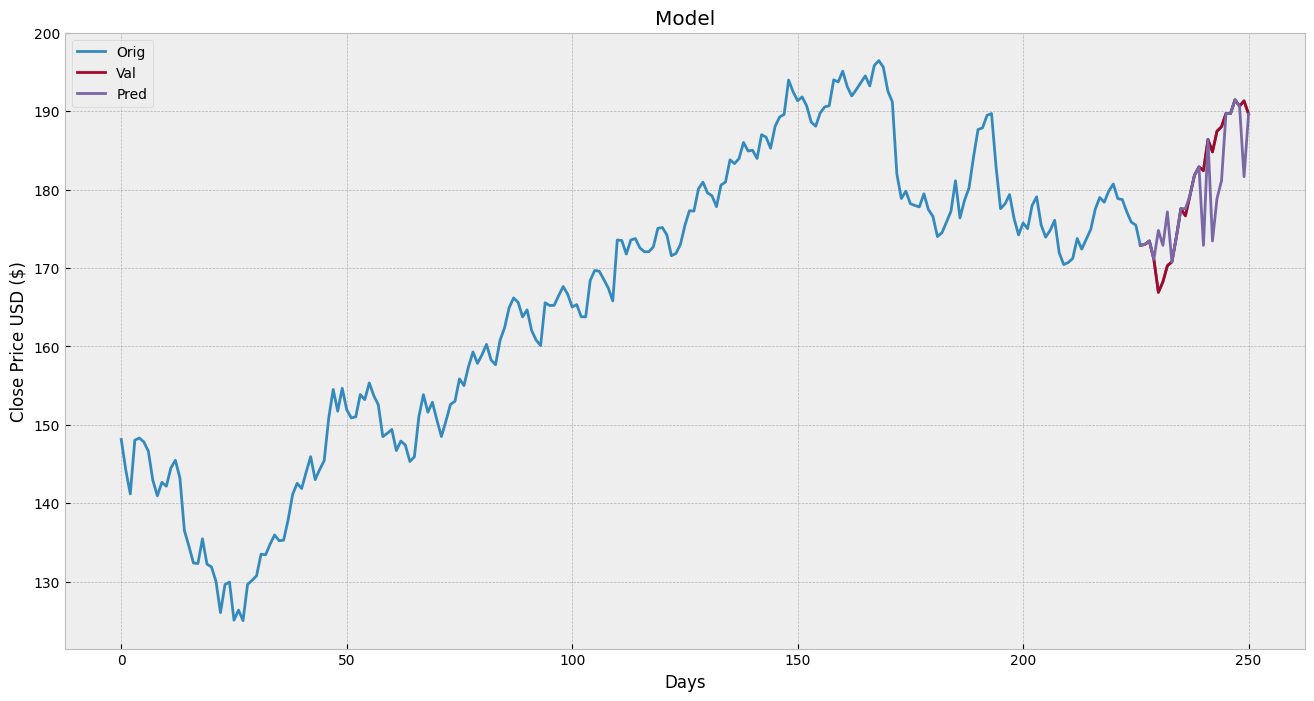

In [36]:
#Visual the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show

<ipython-input-37-dc9f9bdce728>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

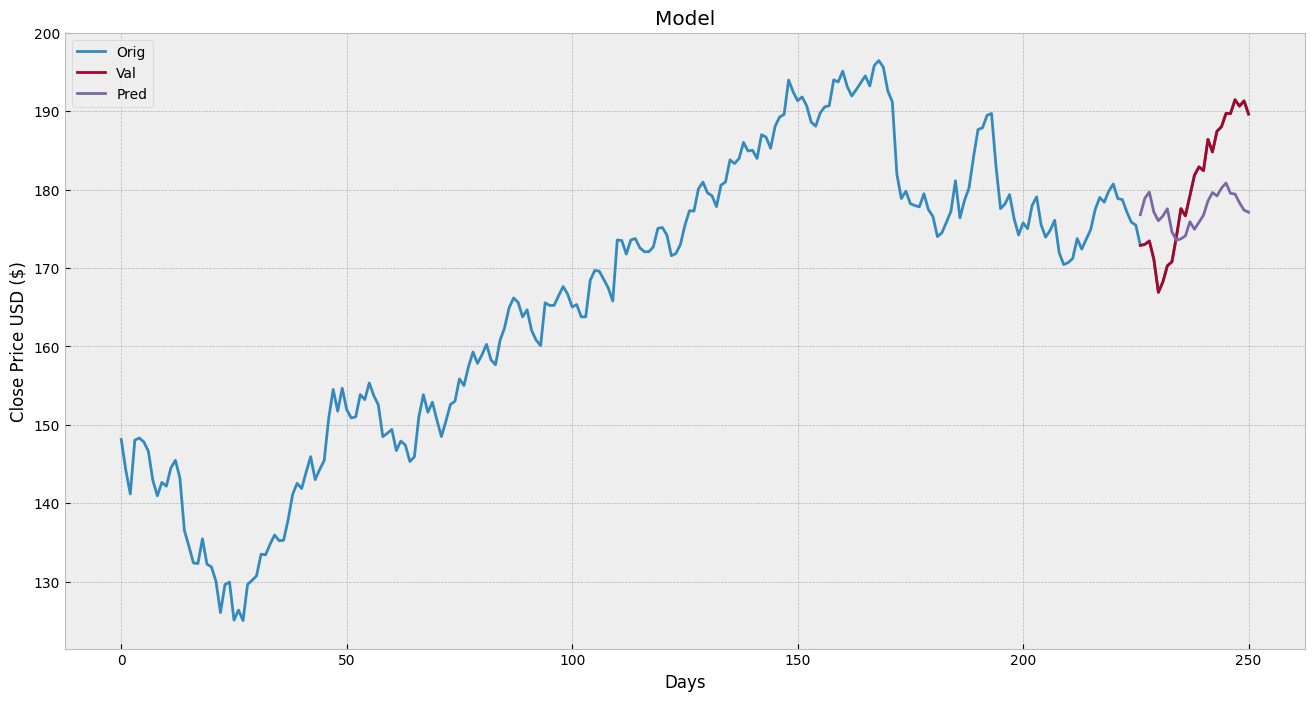

In [37]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show